# <span style="color:blue"> INDR 422/522 - LAB NO. 3</span>
## <span style="color:GREEN">ARMA and SARIMA</span>

### <span style="color:RED">MAIN TOPICS</span>
#### <span style="padding-left: 30px;color:GRAY">1. Fitting a standard ARMA model</span>
#### <span style="padding-left: 30px;color:GRAY">2. Fitting a non-standard ARMA model</span>
#### <span style="padding-left: 30px;color:GRAY">3. Australian beer production</span>
#### <span style="padding-left: 30px;color:GRAY">4. Dishwasher Sales</span>

### <span style="color:RED">INSTALLING REQUIRED TOOLS</span>

In [1]:
# First, you need to install the packages once on your PC. Open a new cell, add following codes (commented ones) -
# and run it, then import following tools:
# pip install matplotlib
# pip install bbplot
# pip install pandas
# pip install numpy

from statsmodels.tsa.api import acf, graphics, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from bbplot import bijan
import pandas as pd
import numpy as np
import itertools
import warnings
import random

### <span style="color:RED">Error Formulas</span>

<span style="color:GRAY">
$
\begin{aligned}
MAE  &= \frac{1}{n} \sum_{n} |Actual-Estimate| && \text{*** Mean Absolute Error}\\    
MAPE &= \frac{1}{n} \sum_{n} |\frac{Actual-Estimate}{Actual}| && \text{*** Mean Absolute Percentage Error}\\
MSE &= \frac{1}{n} \sum_{n} (Actual-Estimate)^2 && \text{*** Mean Squared Error}\\
RMSE &= \sqrt{MSE} && \text{*** Root Mean Square Error}\\
\end{aligned}
$</span>

### <span style="color:RED">Q1. Fitting a standard ARMA model</span>

### <span style="color:GREEN">Q1. (a, b)</span>
#### $Y_t = 100 + 0.5 Y_{t-1} - 0.8\epsilon_{t-1} + \epsilon_{t}$

In [2]:
# Generate an ARMA(1,1) process

# Assumptions
c=100
sigma=15
phi1 = 0.5
theta1 = -0.8


eps = np.random.normal(0, sigma, 500)
y_arma = [0]*500;
y_arma[0] = c
for i in range(1,500):
     y_arma[i] = c + phi1 * y_arma[i-1] + theta1 * eps[i-1] + eps[i]

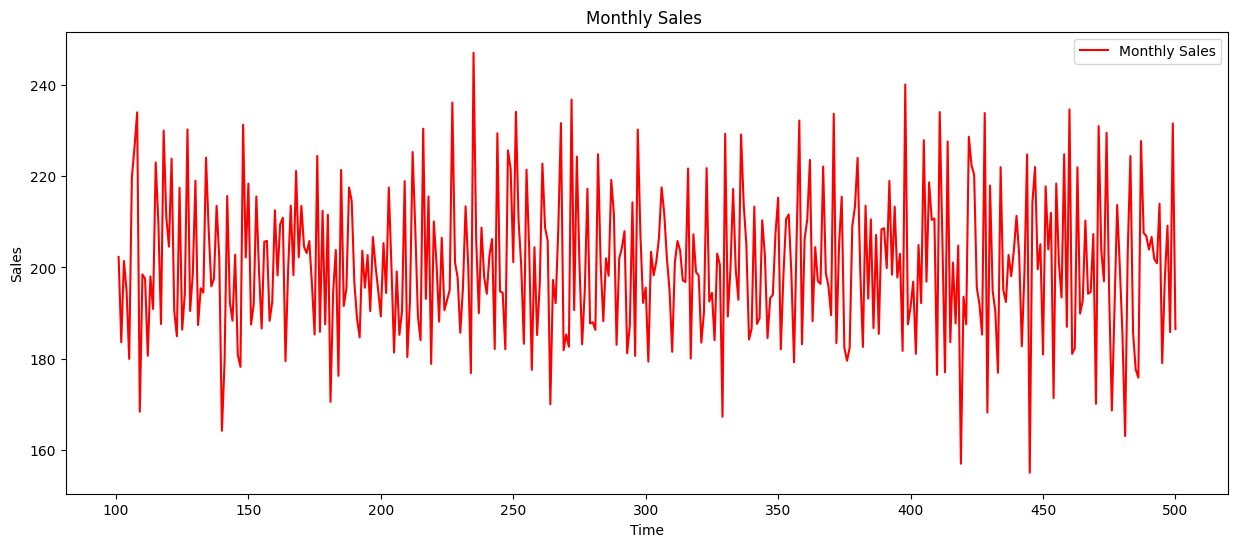

In [3]:
time_axis = np.linspace(1,500,500)
start = 100
plt.figure(figsize = (15, 6))
plt.plot(time_axis[start:],y_arma[start:], 'r', label="Monthly Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Monthly Sales ")
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


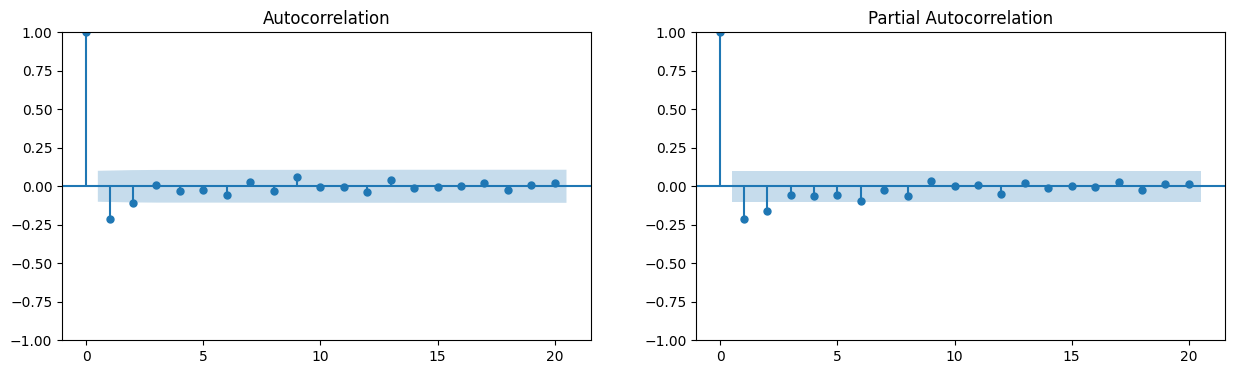

In [4]:
# Graph acf and pacf
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

fig = sm.graphics.tsa.plot_acf(y_arma[20:400], lags=20, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(y_arma[20:400], lags=20, ax=axes[1])

### <span style="color:GREEN">Q1. (c)</span>

In [5]:
# Fit an ARIMA(1,0,0) model using the SARIMAX framework but our model is a simple ARIMA(1,0,0), we only use the regular
#order parameters as order =(1,0,0) and the intercept by specifiying 'trend ='c''

mod_arma1 = sm.tsa.statespace.SARIMAX(y_arma[start:], trend ='c', order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))

# fit the above model, keep various results in an object called results_arma1
results_arma1 = mod_arma1.fit() 
results_arma1.summary() 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15247D+00    |proj g|=  3.77651D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   8.720D-04   4.152D+00
  F =   4.1524722198544364     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1660.989
Date:                Sun, 02 Apr 2023   AIC                           3327.978
Time:                        01:29:08   BIC                           3339.952
Sample:                             0   HQIC                          3332.720
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    246.8980      9.767     25.279      0.000     227.755     266.041
ar.L1         -0.2306      0.049     -4.701      0.000      -0.327      -0.134
sigma2       237.3185     18.519     12.815      0.000     201.022     273.615
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                 2.54
Prob(Q):                              0.47   Prob(JB):                         0.28
Heteroskedasticity (H):               1.34   Skew:                             0.10
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# we can get the residuals ourselves by generating one-step ahead
    
predict1 = results_arma1.get_prediction()

Error1 = y_arma[start:] - predict1.predicted_mean

mae1=np.mean(np.abs(Error1))
mape1=np.mean(np.abs(Error1)/y_arma[start:])*100
mse1=np.mean(Error1**2)
rmse1=np.sqrt(mse1)
print('MAE1  = ', "%.2f" % mae1)
print('MAPE1 = ', "{0:.2f}%".format(mape1))
print('MSE1  = ', "%.2f" % mse1)
print('RMSE1 = ', "%.2f" % rmse1)

MAE1  =  12.46
MAPE1 =  6.25%
MSE1  =  236.73
RMSE1 =  15.39


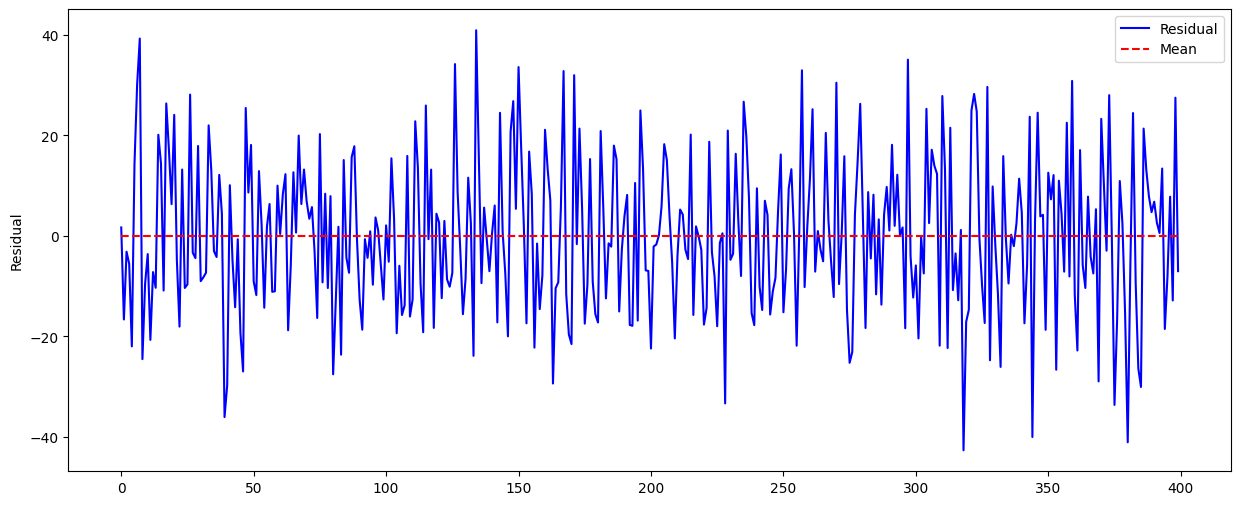

Mean of Residual:    0.00046088438482740914
S.D. of Residual:    15.405370863897023
Half Width :         1.5142919542559146   (degree of freedom = 399, Confidence Level = 0.95)
p-value :            0.9995


In [7]:
bijan.resid(Error1)

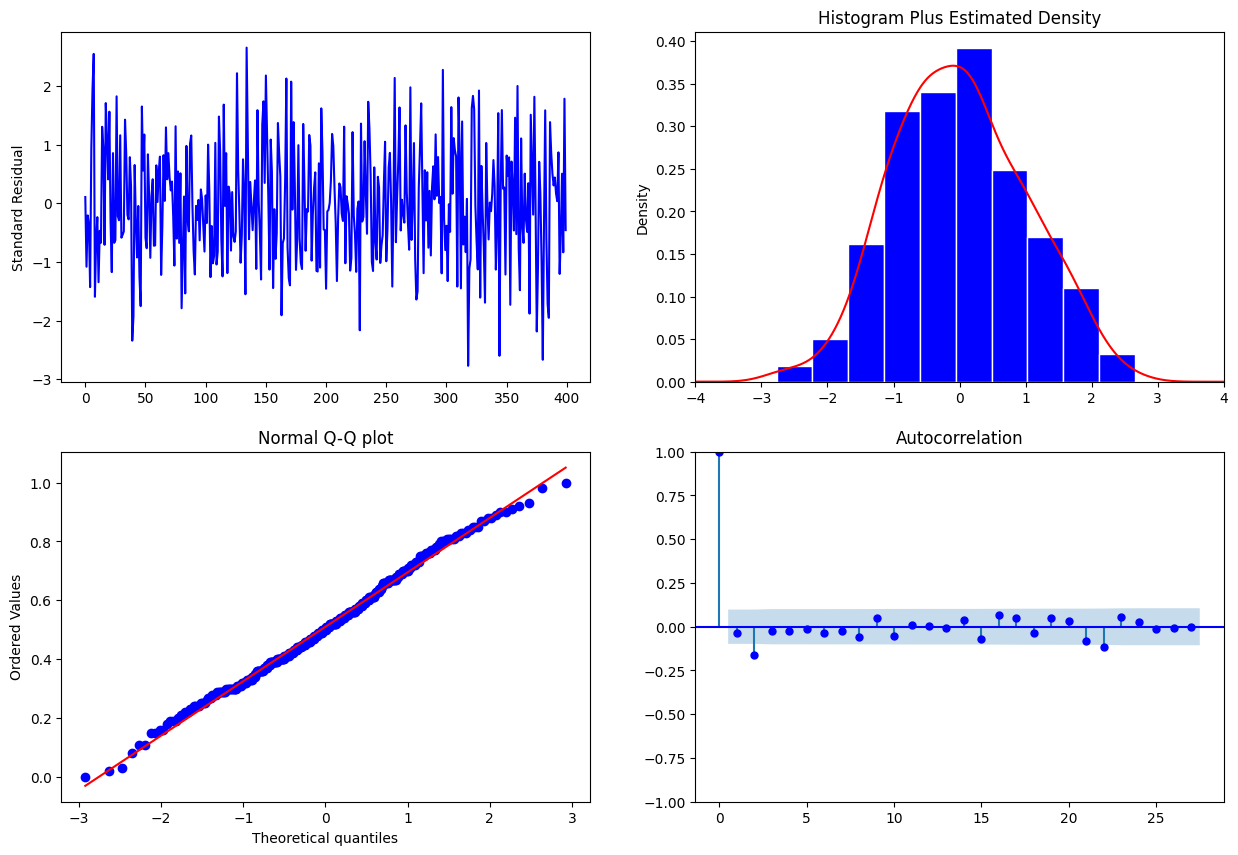

In [8]:
bijan.eplot(Error1)

### <span style="color:GREEN">Q1. (d)</span>

In [9]:
# Let's attempt to fit a different model: an ARIMA(0,0,1)

mod_arma2 = sm.tsa.statespace.SARIMAX(y_arma[start:], trend ='c', order=(0, 0, 1), seasonal_order=(0, 0, 0, 0))

# fit the above model, keep various results in an object called results_arma1
results_arma2 = mod_arma2.fit() 
results_arma2.summary() 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15848D+00    |proj g|=  1.45327D-01

At iterate    5    f=  4.14279D+00    |proj g|=  1.33050D-02

At iterate   10    f=  4.14227D+00    |proj g|=  5.42473D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   5.425D-06   4.142D+00
  F =   4.1422677447922363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1656.907
Date:                Sun, 02 Apr 2023   AIC                           3319.814
Time:                        01:29:09   BIC                           3331.789
Sample:                             0   HQIC                          3324.556
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    200.6364      0.526    381.225      0.000     199.605     201.668
ma.L1         -0.3150      0.045     -6.926      0.000      -0.404      -0.226
sigma2       231.9232     17.736     13.077      0.000     197.162     266.685
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.50   Prob(JB):                         0.44
Heteroskedasticity (H):               1.33   Skew:                             0.07
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# we can get the residuals ourselves by generating one-step ahead
    
predict2 = results_arma2.get_prediction()

Error2 = y_arma[start:] - predict2.predicted_mean

mae2=np.mean(np.abs(Error2))
mape2=np.mean(np.abs(Error2)/y_arma[start:])*200
mse2=np.mean(Error2**2)
rmse2=np.sqrt(mse2)
print('MAE2  = ', "%.2f" % mae2)
print('MAPE2 = ', "{0:.2f}%".format(mape2))
print('MSE2  = ', "%.2f" % mse2)
print('RMSE2 = ', "%.2f" % rmse2)

MAE2  =  12.36
MAPE2 =  12.40%
MSE2  =  231.93
RMSE2 =  15.23


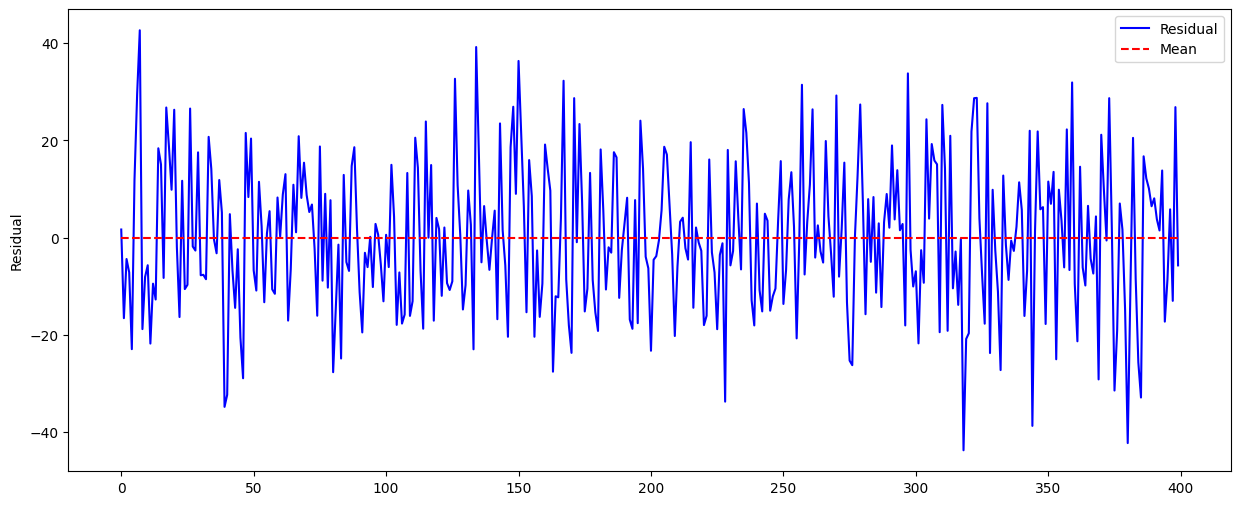

Mean of Residual:    -0.004478411801237314
S.D. of Residual:    15.248249037358486
Half Width :         1.4988474498770623   (degree of freedom = 399, Confidence Level = 0.95)
p-value :            0.9953


In [11]:
bijan.resid(Error2)

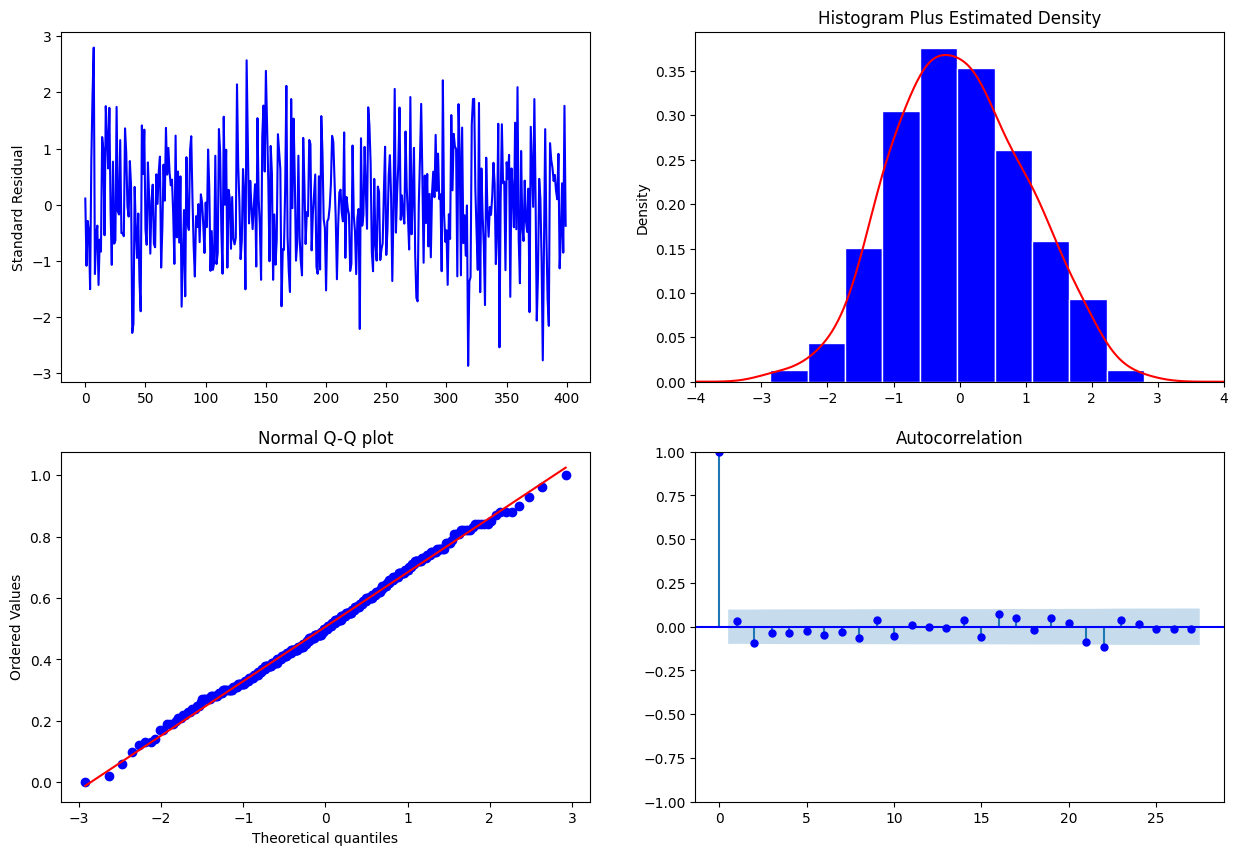

In [12]:
bijan.eplot(Error2)

### <span style="color:GREEN">Q1. (e)</span>

In [13]:
#  Fit an ARIMA(1,0,1) model

mod_arma3 = sm.tsa.statespace.SARIMAX(y_arma[start:], trend ='c', order=(1, 0, 1), seasonal_order=(0, 0, 0, 0))

# fit the above model, keep various results in an object called results_arma1
results_arma3 = mod_arma3.fit() 
results_arma3.summary() 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16378D+00    |proj g|=  1.02062D-01

At iterate    5    f=  4.16327D+00    |proj g|=  1.27361D-01

At iterate   10    f=  4.16280D+00    |proj g|=  4.17087D-03

At iterate   15    f=  4.16274D+00    |proj g|=  5.43241D-02

At iterate   20    f=  4.16257D+00    |proj g|=  2.30880D-04

At iterate   25    f=  4.16245D+00    |proj g|=  6.38842D-02

At iterate   30    f=  4.15596D+00    |proj g|=  3.84733D-01

At iterate   35    f=  4.14858D+00    |proj g|=  1.24619D+00

At iterate   40    f=  4.13641D+00    |proj g|=  1.21827D-01

At iterate   45    f=  4.13511D+00    |proj g|=  2.34860D-01

At iterate   50    f=  4.13461D+00    |proj g|=  5.16712D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1653.844
Date:                Sun, 02 Apr 2023   AIC                           3315.689
Time:                        01:29:11   BIC                           3331.654
Sample:                             0   HQIC                          3322.011
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    132.0314     24.062      5.487      0.000      84.870     179.192
ar.L1          0.3415      0.120      2.844      0.004       0.106       0.577
ma.L1         -0.6376      0.099     -6.415      0.000      -0.832      -0.443
sigma2       228.9617     17.212     13.302      0.000     195.226     262.697
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.85   Prob(JB):                         0.65
Heteroskedasticity (H):               1.33   Skew:                             0.07
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# we can get the residuals ourselves by generating one-step ahead
    
predict3 = results_arma3.get_prediction()

Error3 = y_arma[start:] - predict3.predicted_mean

mae3=np.mean(np.abs(Error3))
mape3=np.mean(np.abs(Error3)/y_arma[start:])*100
mse3=np.mean(Error3**2)
rmse3=np.sqrt(mse3)
print('MAE3  = ', "%.2f" % mae3)
print('MAPE3 = ', "{0:.2f}%".format(mape3))
print('MSE3  = ', "%.2f" % mse3)
print('RMSE3 = ', "%.2f" % rmse3)

MAE3  =  12.21
MAPE3 =  6.12%
MSE3  =  228.40
RMSE3 =  15.11


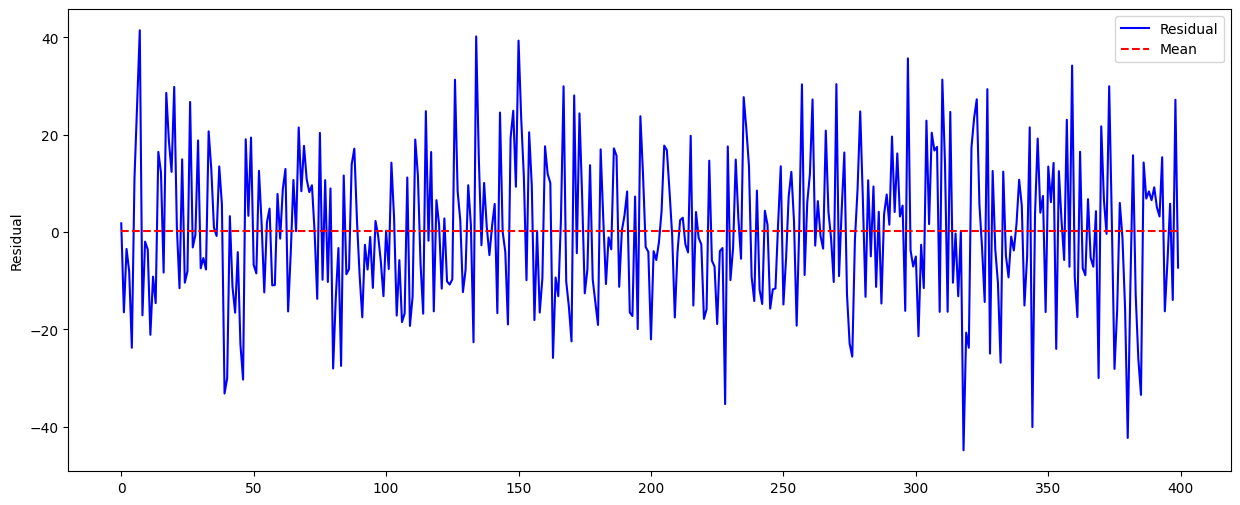

Mean of Residual:    0.23469776098433834
S.D. of Residual:    15.129947161321786
Half Width :         1.487218805514103   (degree of freedom = 399, Confidence Level = 0.95)
p-value :            0.7565


In [15]:
bijan.resid(Error3)

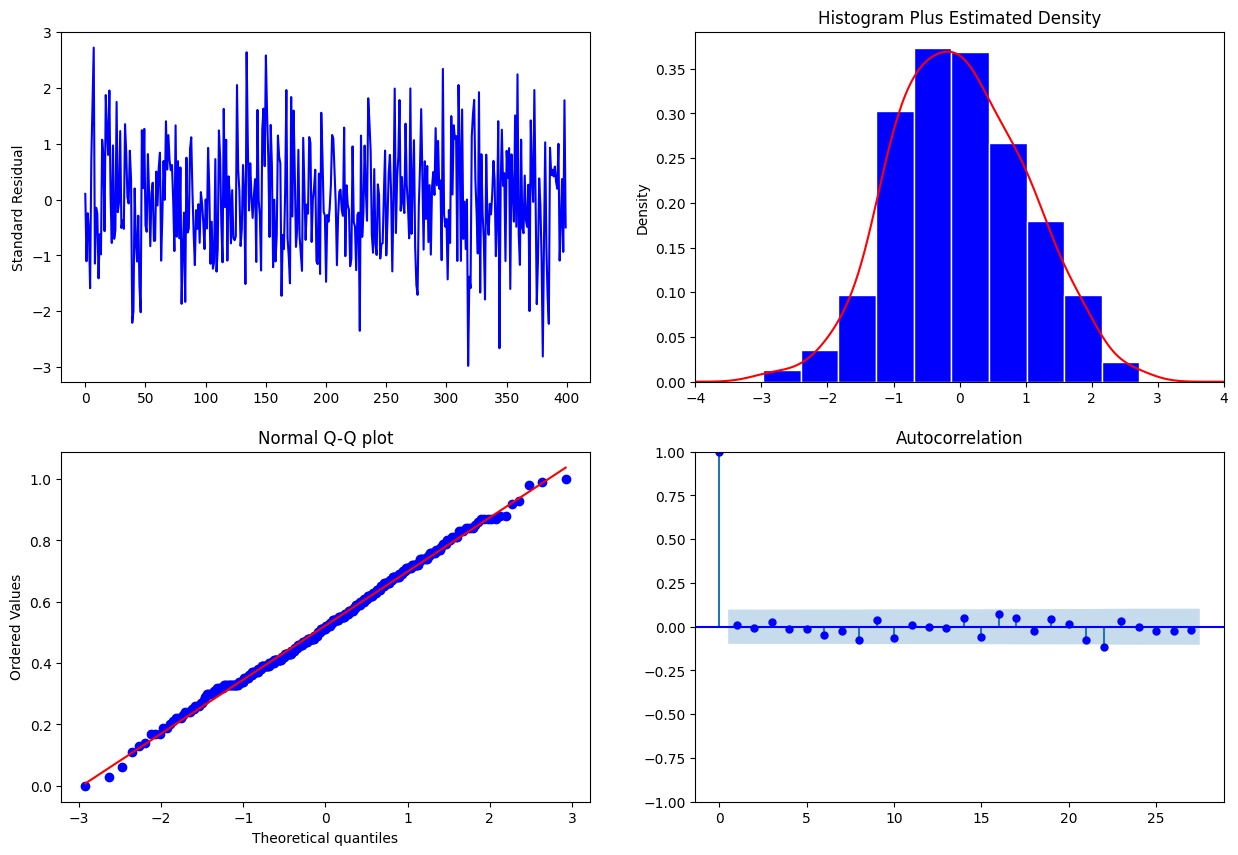

In [16]:
bijan.eplot(Error3)

### <span style="color:RED">Q2. Fitting a non-standard ARMA model</span>

### <span style="color:GREEN">Q2. (a)</span>

In [17]:
# Generate an ARMA(1,1) process

c=100
sigma=15

theta2 = -0.8

eps = np.random.normal(0, sigma, 500)
y_arma2 = [0]*500;
y_arma2[0]=c
y_arma2[1]=c
for i in range(2,500):
     y_arma2[i] = c + theta2 * eps[i-2] + eps[i]

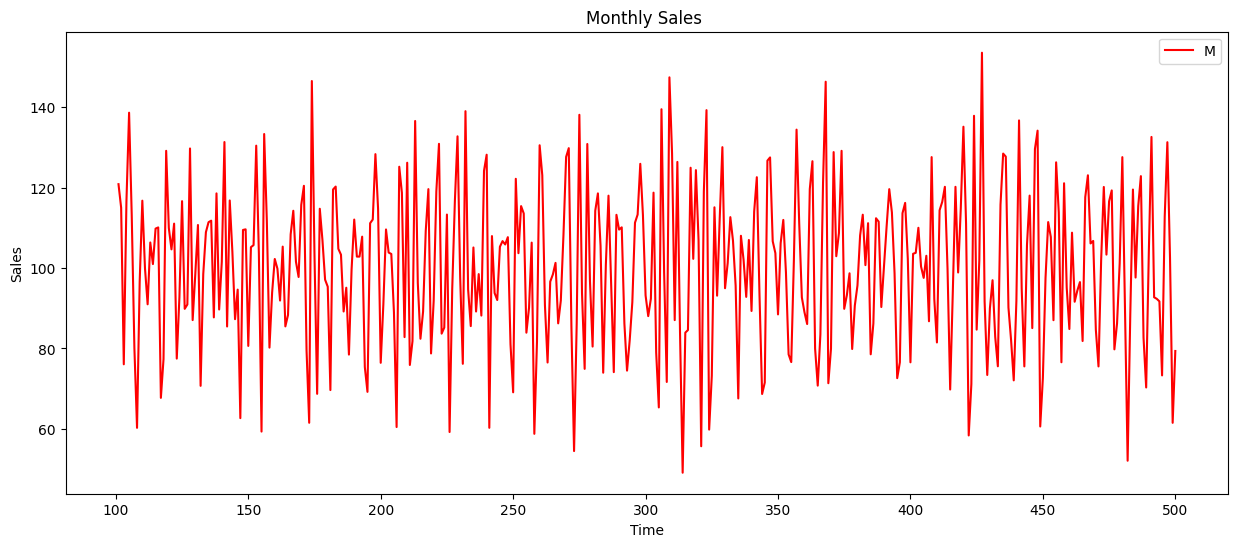

In [18]:
time_axis = np.linspace(1,500,500)
start = 100
plt.figure(figsize = (15, 6))
plt.plot(time_axis[start:],y_arma2[start:], 'r')
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Monthly Sales ")
plt.legend("Monthly Sales ")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


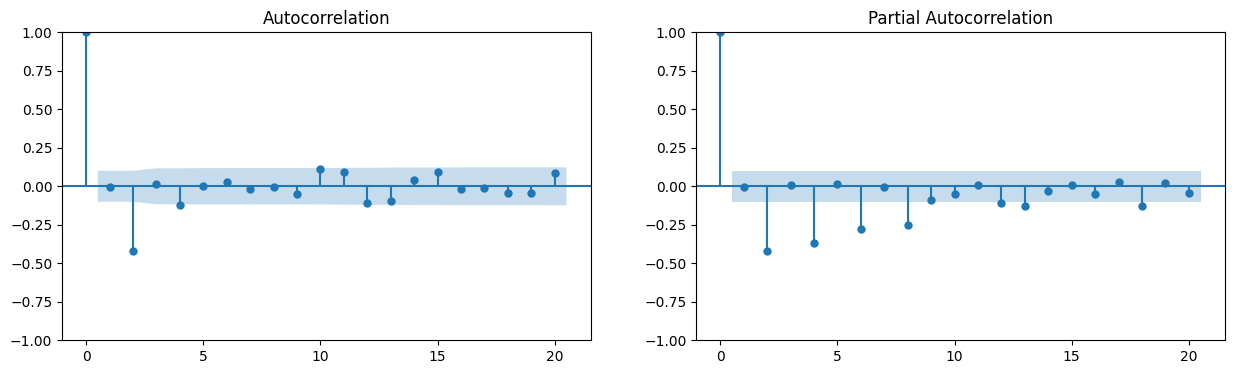

In [19]:
# Graph acf and pacf
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

fig = sm.graphics.tsa.plot_acf(y_arma2[20:400], lags=20, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(y_arma2[20:400], lags=20, ax=axes[1])

### <span style="color:GREEN">Q2. (b)</span>

In [20]:
# Fit a model where we specify that the only MA coefficient is at lag 2: order=(0, 0, [2])

mod_ma2 = sm.tsa.statespace.SARIMAX(y_arma2[start:], trend ='c', order=(0, 0, [2]), seasonal_order=(0, 0, 0, 0))
results_ma2 = mod_ma2.fit()
results_ma2.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25240D+00    |proj g|=  2.43178D-01

At iterate    5    f=  4.15354D+00    |proj g|=  1.90627D-02

At iterate   10    f=  4.14655D+00    |proj g|=  2.29772D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     11      1     0     0   2.298D-07   4.147D+00
  F =   4.1465453259209912     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:             SARIMAX(0, 0, [2])   Log Likelihood               -1658.618
Date:                Sun, 02 Apr 2023   AIC                           3323.236
Time:                        01:29:13   BIC                           3335.211
Sample:                             0   HQIC                          3327.978
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    100.1469      0.159    630.735      0.000      99.836     100.458
ma.L2         -0.7965      0.033    -24.501      0.000      -0.860      -0.733
sigma2       232.7998     18.012     12.925      0.000     197.496     268.103
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.70   Prob(JB):                         0.31
Heteroskedasticity (H):               1.07   Skew:                             0.10
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# we can get the residuals ourselves by generating one-step ahead
    
predict4 = results_ma2.get_prediction()

Error4 = y_arma2[start:] - predict4.predicted_mean

mae4=np.mean(np.abs(Error4))
mape4=np.mean(np.abs(Error4)/y_arma2[start:])*100
mse4=np.mean(Error4**2)
rmse4=np.sqrt(mse4)
print('MAE4  = ', "%.2f" % mae4)
print('MAPE4 = ', "{0:.2f}%".format(mape4))
print('MSE4  = ', "%.2f" % mse4)
print('RMSE4 = ', "%.2f" % rmse4)

MAE4  =  12.35
MAPE4 =  13.09%
MSE4  =  234.36
RMSE4 =  15.31


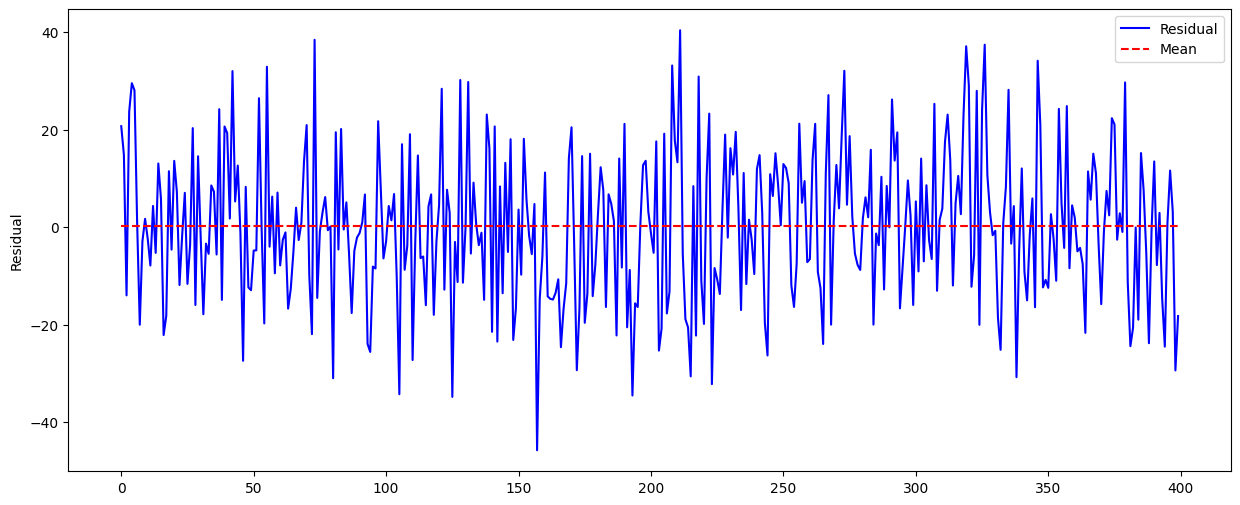

Mean of Residual:    0.15120072866304596
S.D. of Residual:    15.327318985566766
Half Width :         1.5066197383505475   (degree of freedom = 399, Confidence Level = 0.95)
p-value :            0.8437


In [22]:
bijan.resid(Error4)

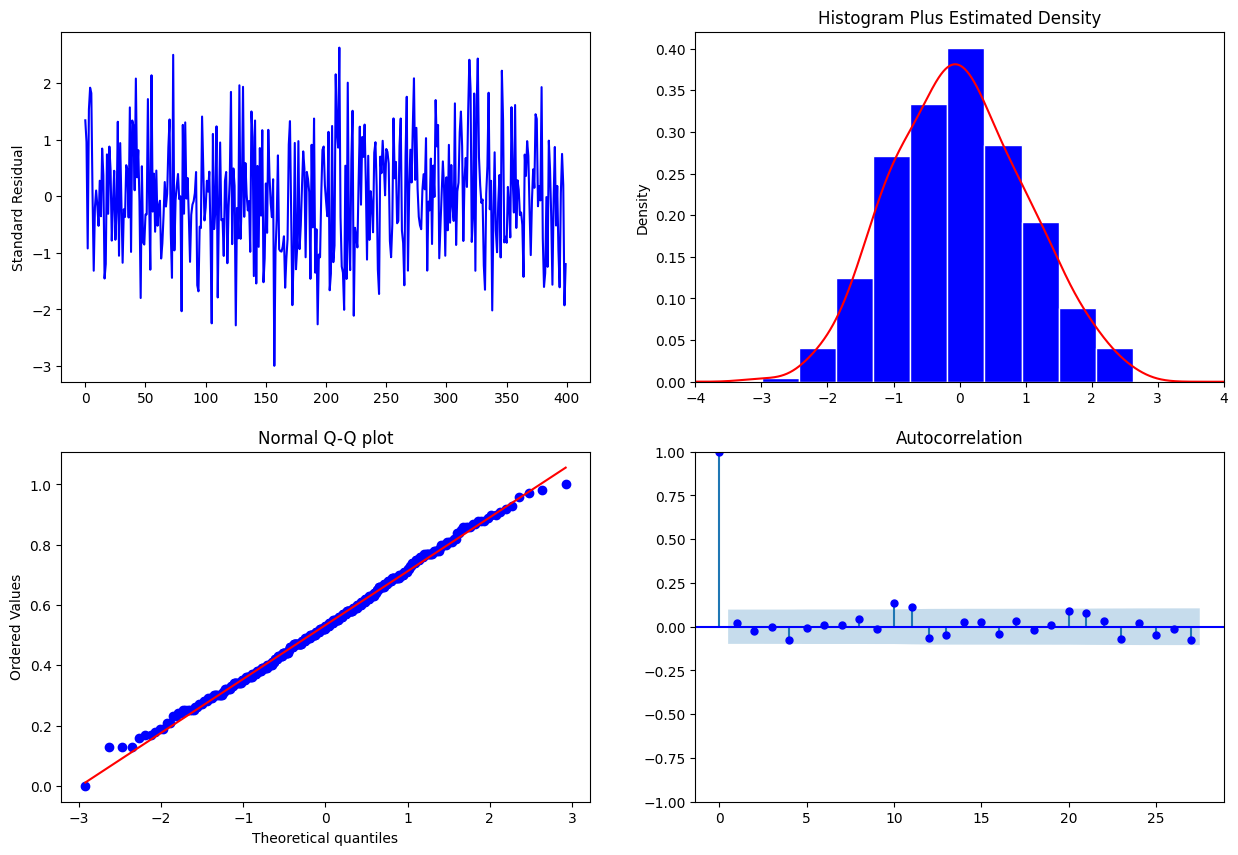

In [23]:
bijan.eplot(Error4)

### <span style="color:RED">Q3. Australian beer production</span>

### <span style="color:GREEN">Q3. (a)</span>

In [24]:
data = pd.read_csv("ausbeer.csv", header=None)
data.columns=['Month', 'Production']
prod = data['Production']
month = data['Month']
data.head()

,Month,Production
0,1,164
1,2,148
2,3,152
3,4,144
4,5,155


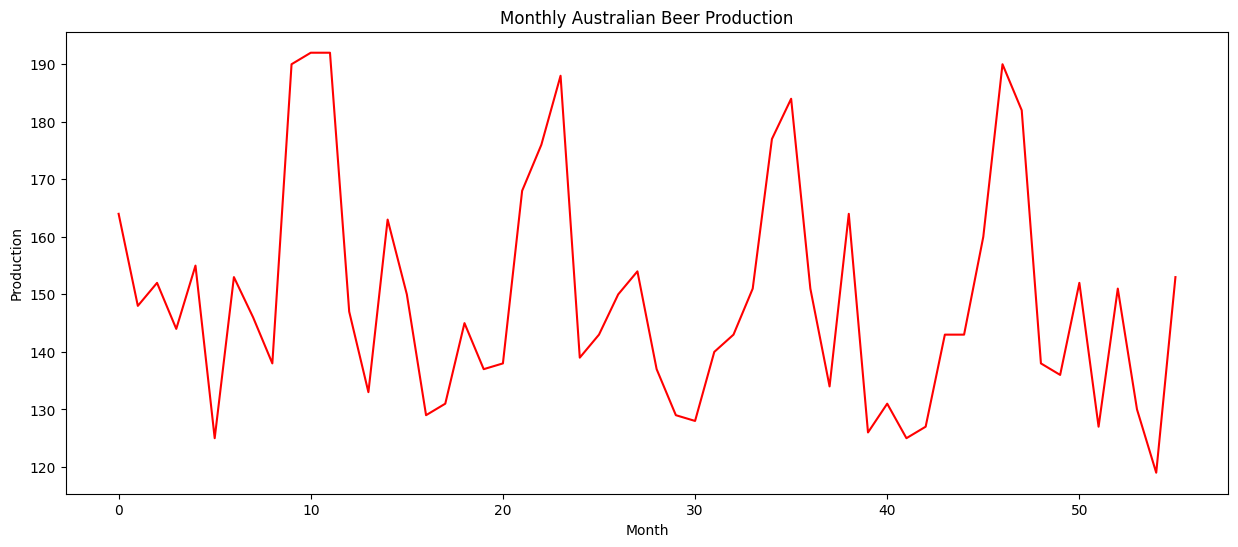

In [25]:
plt.figure(figsize = (15, 6))
plt.plot(range(0, len(month)),prod, 'r')


plt.xlabel("Month")
plt.ylabel("Production")
plt.title("Monthly Australian Beer Production")
plt.show()

### <span style="color:GREEN">Q3. (b)</span>

In [26]:
# We have already seen that the data is seasonal (12 months) but has no apparent trend and when we take a seasonal difference
# no auto-correlation remains. We can still use the SARIMAX framework to implement the seasonal difference
# Note that we are just implementing a simple seasonal difference without any AR or MA terms.

mod_beer = sm.tsa.statespace.SARIMAX(prod, trend ='c',  order=(0,0,0) , seasonal_order=(0,1,0,12))
res_beer = mod_beer.fit(disp=False)
res_beer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:               Production   No. Observations:                   56
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -168.421
Date:                  Sun, 02 Apr 2023   AIC                            340.842
Time:                          01:29:14   BIC                            344.411
Sample:                               0   HQIC                           342.166
                                   - 56                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.6818      1.725     -1.554      0.120      -6.063       0.700
sigma2       123.6715     31.796      3.889      0.000      61.352     185.991
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.33   Prob(JB):                         0.57
Heteroskedasticity (H):               0.66   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
# one-step ahead predictions and error performance using the above model

predict_beer = res_beer.get_prediction()
mse_beer = np.mean(np.square(res_beer.resid))
rmse_beer = np.sqrt(mse_beer)
mae_beer = np.mean(np.abs(res_beer.resid))
mape_beer = np.mean(np.abs(res_beer.resid)/prod)*100



print('MAE_Beer  = ', "%.2f" % mae_beer)
print('MAPE_Beer = ', "{0:.2f}%".format(mape_beer))
print('MSE_Beer  = ', "%.2f" % mse_beer)
print('RMSE_Beer = ', "%.2f" % rmse_beer)

MAE_Beer  =  41.71
MAPE_Beer =  26.76%
MSE_Beer  =  5742.86
RMSE_Beer =  75.78


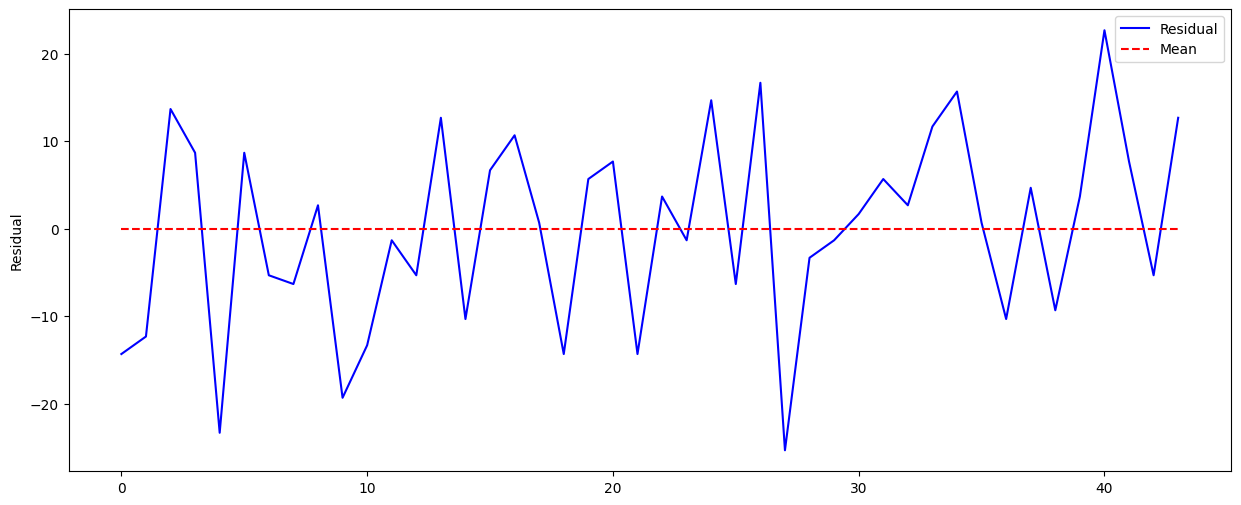

Mean of Residual:    3.2297397080004555e-16
S.D. of Residual:    11.249336367553397
Half Width :         3.4201108469826025   (degree of freedom = 43, Confidence Level = 0.95)
p-value :            1.0000


In [28]:
bijan.resid(res_beer.resid[12:])

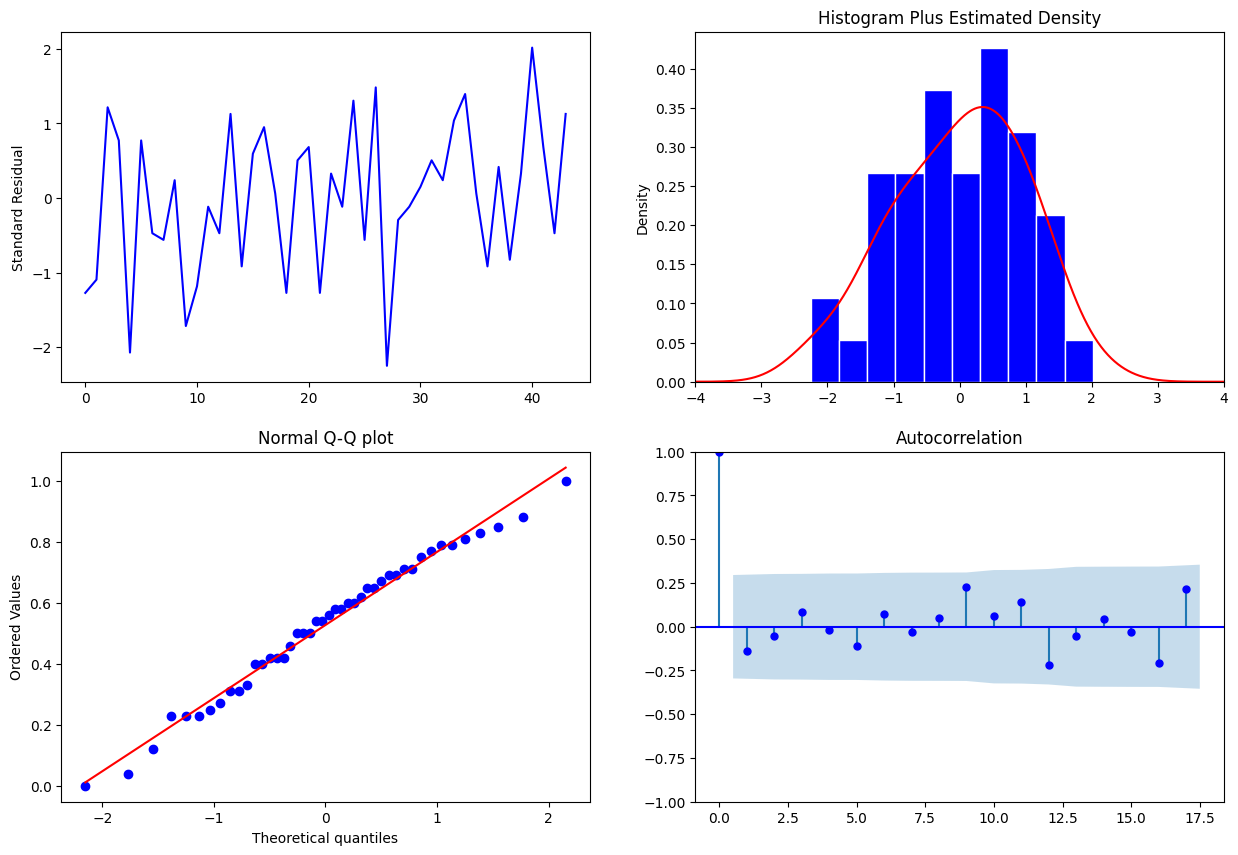

In [29]:
bijan.eplot(res_beer.resid[12:])

### <span style="color:GREEN">Q3. (c)</span>

In [30]:
# let's also take regular difference and see if it improves the predictions

mod_beer2 = sm.tsa.statespace.SARIMAX(prod, trend ='c',  order=(0,1,0) , seasonal_order=(0,1,0,12))
res_beer2 = mod_beer2.fit(disp=False)
res_beer2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Production   No. Observations:                   56
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -182.159
Date:                            Sun, 02 Apr 2023   AIC                            368.318
Time:                                    01:29:15   BIC                            371.840
Sample:                                         0   HQIC                           369.617
                                             - 56                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6279      2.658      0.236      0.813      -4.581       5.837
sigma2       279.9546     72.652      3.853      0.000     137.559     422.350
===================================================================================
Ljung-Box (L1) (Q):                  13.20   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.00   Prob(JB):                         0.52
Heteroskedasticity (H):               0.47   Skew:                            -0.34
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# predictions and error performance

predict_beer2 = res_beer2.get_prediction() # we can get the residuals ourselves by generating predictions first
mse_beer2 = np.mean(np.square(res_beer2.resid)) # or get the residuals array directly from the results table
rmse_beer2 = np.sqrt(mse_beer2)
mae_beer2 = np.mean(np.abs(res_beer2.resid))
mape_beer2 = np.mean(np.abs(res_beer2.resid)/prod)*100


print('MAE Beer Seasonal  with Diff = ', "%.2f" % mae_beer2)
print('MAPE Beer Seasonal with Diff = ', "{0:.2f}%".format(mape_beer2))
print('MSE Beer Seasonal with Diff  = ', "%.2f" % mse_beer2)
print('RMSE Beer Seasonal with Diff = ', "%.2f" % rmse_beer2)

MAE Beer Seasonal  with Diff =  18.85
MAPE Beer Seasonal with Diff =  12.69%
MSE Beer Seasonal with Diff  =  1071.99
RMSE Beer Seasonal with Diff =  32.74


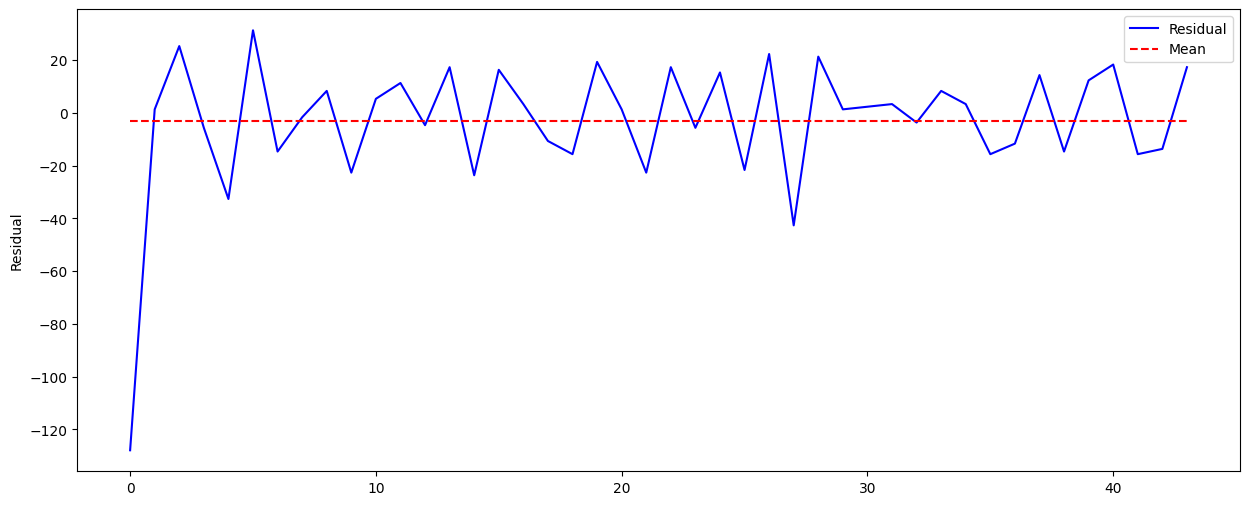

Mean of Residual:    -2.9080293876325496
S.D. of Residual:    25.53520132069714
Half Width :         7.763410761606976   (degree of freedom = 43, Confidence Level = 0.95)
p-value :            0.4541


In [32]:
bijan.resid(res_beer2.resid[12:])

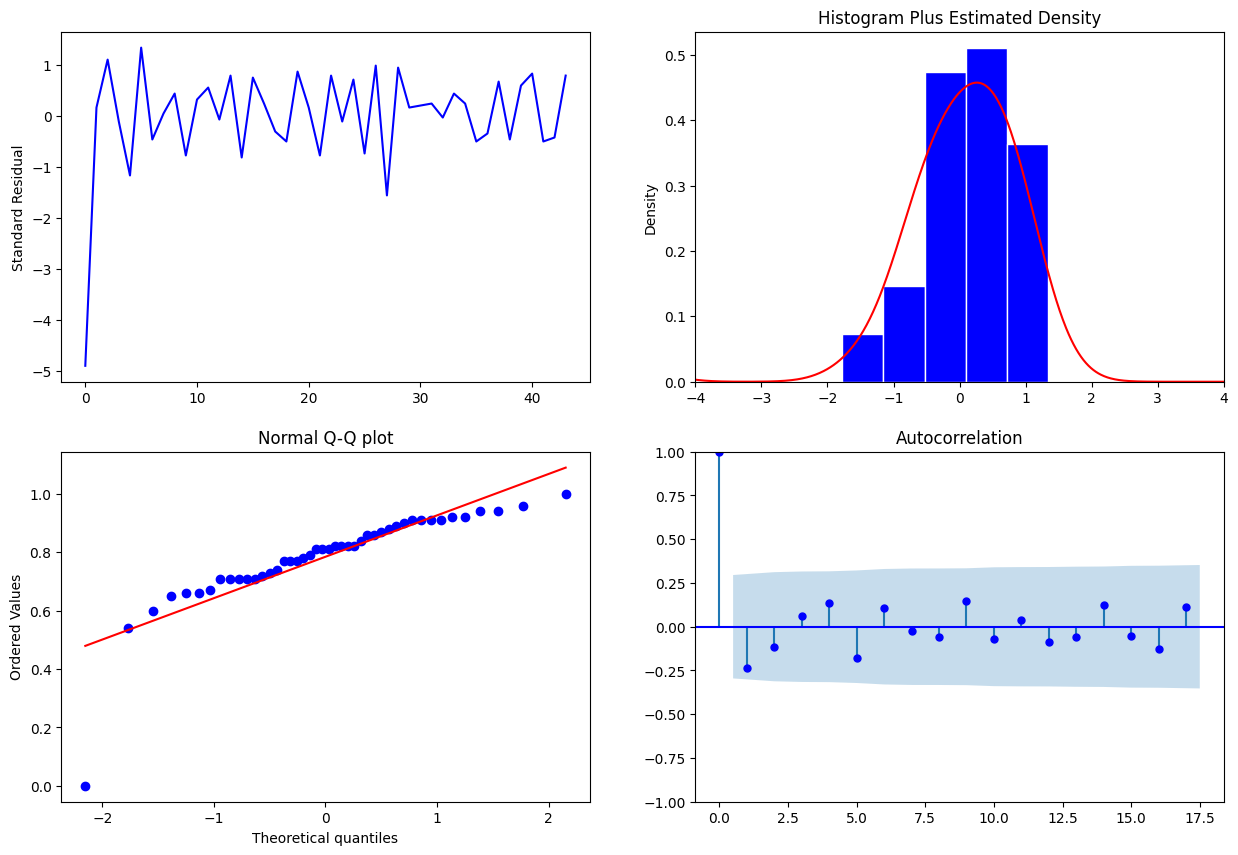

In [33]:
bijan.eplot(res_beer2.resid[12:])

### <span style="color:GREEN">Q3. (d, e)</span>

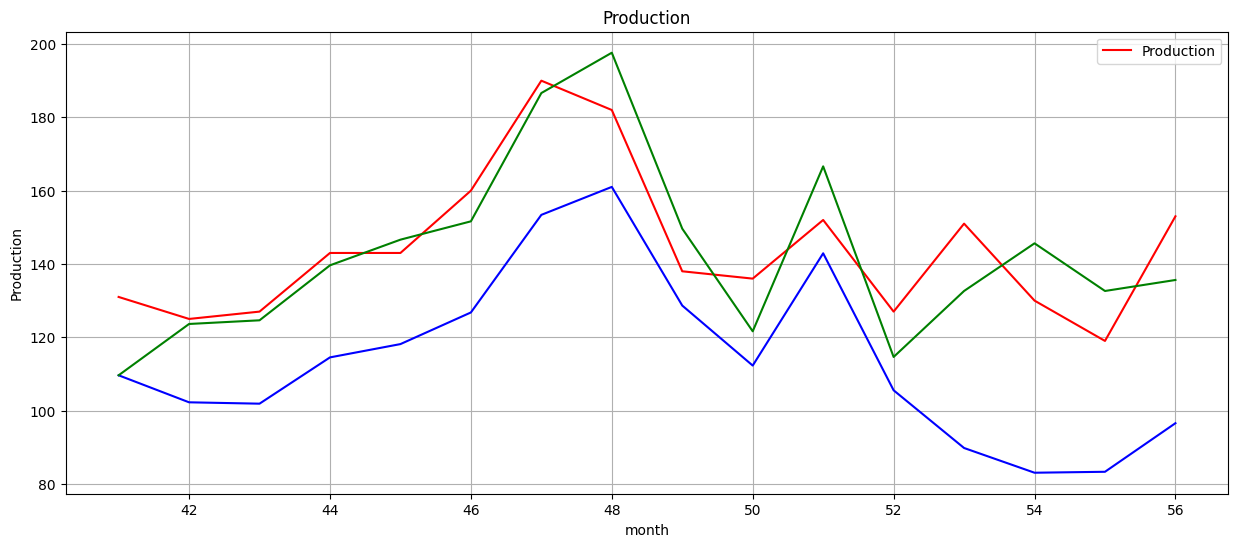

In [34]:
# the default prediction is one step ahead but we can also have multiple-step ahead forecasts using the 'dynamic prediction' capability
# Let's assume that we have data available until month for 40 and let's make multi-step predictions using only data upto month 40
# Note that multi-step ahead forecasts replace observations with forecasts (once we have a forecast for month 41, we can use that as
#an input to month 41 and so on)
predict_dy = res_beer2.get_prediction(dynamic=40)
predict_dy_ci = predict_dy.conf_int()

# We can now plot the data from mpnth 40 onwards 
predict_beer3 = res_beer2.get_prediction()
time_axis = np.linspace(1,500,500)
plt.figure(figsize = (15, 6))
plt.grid()
plt.plot(time_axis[40:56],prod[40:56], 'r') # the production data in red
plt.plot(time_axis[40:56],predict_dy.predicted_mean[40:56], 'b') # the dynamic predictions using only data upto period 40 in blue
plt.plot(time_axis[40:56],predict_beer3.predicted_mean[40:56], 'g') # one-step ahead predictions using all data available 
#up to month t-1 to predict month t (in green)

plt.xlabel("month")
plt.ylabel("Production")
plt.title("Production")
plt.legend(['Production'])
plt.show()

### <span style="color:GREEN">Q3. (f)</span>

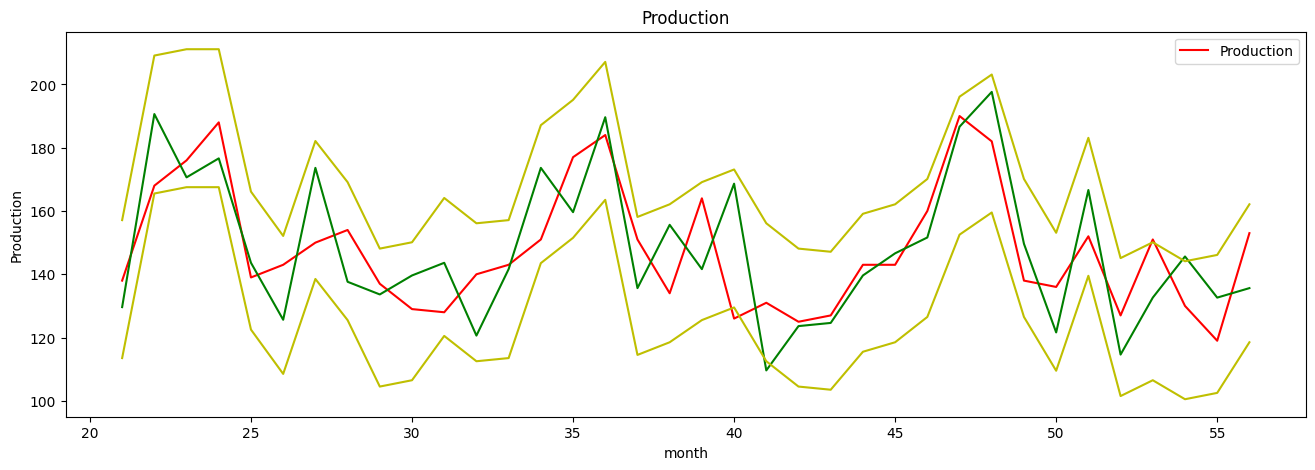

In [35]:
#  note that we can also get the prediction intervals around one-step ahead predictions (or multi-step predictions)

predict_beer3_ci = predict_beer.conf_int()


# Let's plot the data, one-step ahead predictions and confidence intervals
time_axis = np.linspace(1,500,500)
plt.figure(figsize = (16, 5))
plt.plot(time_axis[20:56],prod[20:56], 'r') # the production data in red
plt.plot(time_axis[20:56],predict_beer3.predicted_mean[20:56], 'g') # one-step ahead predictionsin green
plt.plot(time_axis[20:56],predict_beer3_ci.iloc[20:56,0], 'y') # lower end of prediction interval in yellow
plt.plot(time_axis[20:56],predict_beer3_ci.iloc[20:56,1], 'y') # upper end of prediction interval in yellow
#up to month t-1 to predict month t (in green)

plt.xlabel("month")
plt.ylabel("Production")
plt.title("Production")
plt.legend(['Production'])
plt.show()

# The one-step ahead predictions in green are now wrapped within 95% prediction intervals in yellow.
# In this case, the real production steps outside the prediction interval rarely.

### <span style="color:RED">Q4. Dishwasher Sales</span>

### <span style="color:GREEN">Q4. (a)</span>

In [36]:
data = pd.read_csv("dishwasher.csv", header=None)
data.columns=['Day', 'Sales']
sales = data['Sales']
day = data['Day']
data

,Day,Sales
0,1,26724.0
1,2,25761.0
2,3,26983.0
3,4,26993.0
4,5,27072.0
...,...,...
309,310,87540.0
310,311,110783.0
311,312,99736.0
312,313,103901.0


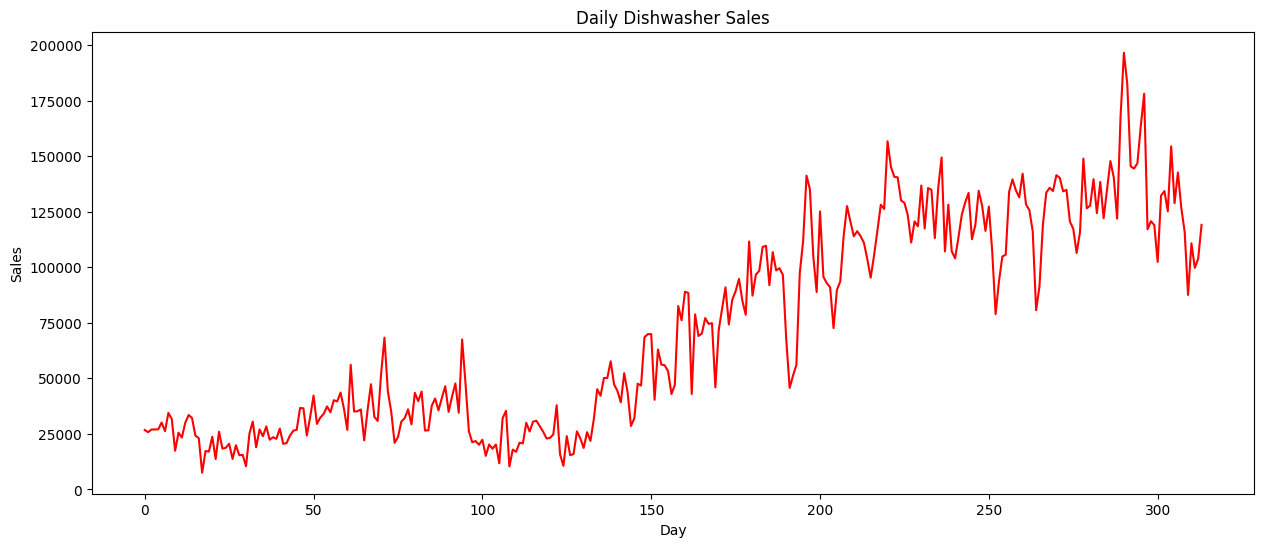

In [37]:
plt.figure(figsize = (15, 6))
plt.plot(range(0, len(day)),sales, 'r')


plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Daily Dishwasher Sales")
plt.show()

### <span style="color:GREEN">Q4. (b)</span>

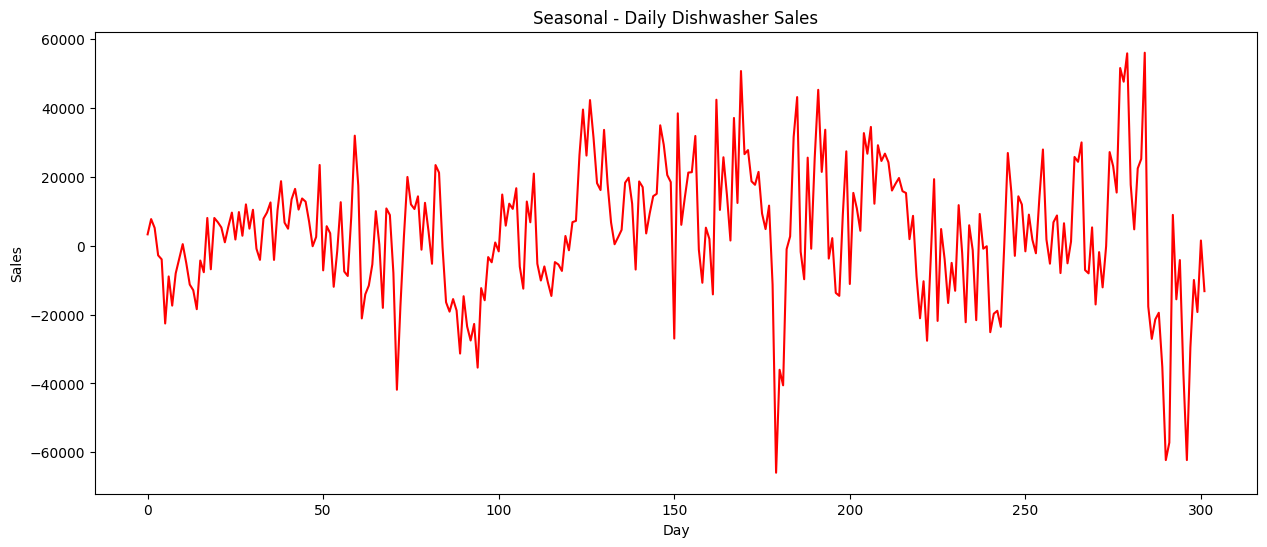

In [38]:
# You might remember that this is a series with both trend and seasonality. Let's handle them first
season_sales = [0]*len(day);
for i in range(12,len(day)):
    season_sales[i] =sales[i]- sales[i-12]

    
plt.figure(figsize = (15, 6))
plt.plot(range(0, len(day)-12),season_sales[12:], 'r')


plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Seasonal - Daily Dishwasher Sales")
plt.show()

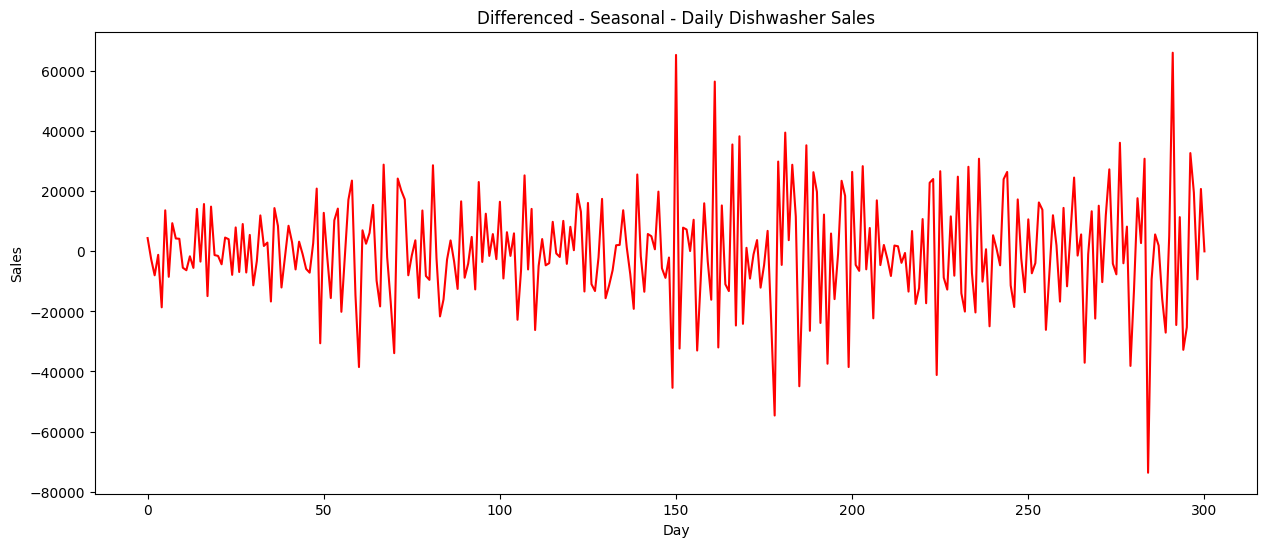

In [39]:
# take a regular difference

season_sales_range = season_sales[12:]

diff_sales = [0]*len(season_sales_range)


for i in range(1,len(season_sales_range)-1):
    diff_sales[i] =season_sales_range[i]- season_sales_range[i-1]

    
plt.figure(figsize = (15, 6))
plt.plot(range(0, len(season_sales_range)-1),diff_sales[1:], 'r')


plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Differenced - Seasonal - Daily Dishwasher Sales")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


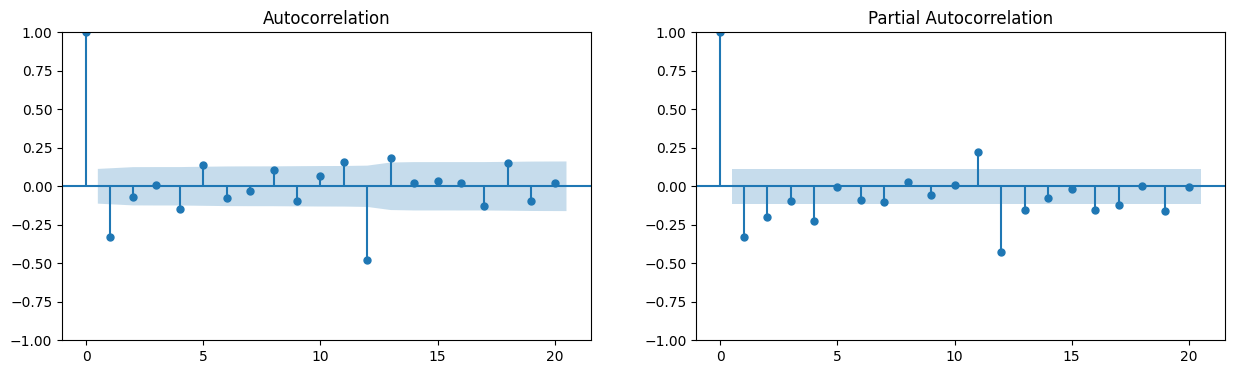

In [40]:
# Check the acf and pcf after seasonal differencing and regular differencing
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(diff_sales, lags=20, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(diff_sales, lags=20, ax=axes[1])

### <span style="color:GREEN">Q4. (c)</span>

In [41]:
#A seasonal MA term and a regular MA term after detrending and deseasonalizing on the training set (months 1 to 200)

mod_dw = sm.tsa.statespace.SARIMAX(sales[0:200], trend ='c',  order=(0,1,1) , seasonal_order=(0,1,1,12))
res_dw = mod_dw.fit(disp=False)
res_dw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  200
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2033.874
Date:                            Sat, 01 Apr 2023   AIC                           4075.747
Time:                                    23:46:32   BIC                           4088.672
Sample:                                         0   HQIC                          4080.984
                                            - 200                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -13.3074    263.387     -0.051      0.960    -529.537     502.922
ma.L1         -0.3829      0.083     -4.605      0.000      -0.546      -0.220
ma.S.L12      -0.7306      0.089     -8.192      0.000      -0.905      -0.556
sigma2      2.371e+08      0.000   4.98e+11      0.000    2.37e+08    2.37e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                23.97
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               3.19   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.93e+27. Standard errors may be unstable.
"""

In [42]:
# All three coefficients seem statistically significant. Let's get the one-step ahead predictions and the error measures:

predict_dw = res_dw.get_prediction() # we can get the residuals ourselves by generating predictions first
mse_dw = np.mean(np.square(res_dw.resid)) # or get the residuals array directly from the results table
rmse_dw = np.sqrt(mse_dw)
mae_dw = np.mean(np.abs(res_dw.resid))
mape_dw = np.mean(np.abs(res_dw.resid)/sales[0:199])*100


print('MAE Dishwasher = ', "%.2f" % mae_dw)
print('MAPE Dishwasher = ', "{0:.2f}%".format(mape_dw))
print('MSE Dishwasher  = ', "%.2f" % mse_dw)
print('RMSE Dishwasher = ', "%.2f" % rmse_dw)

MAE Dishwasher =  8722.77
MAPE Dishwasher =  24.87%
MSE Dishwasher  =  142255897.15
RMSE Dishwasher =  11927.11


In [43]:
# Let's look at some other forecasts to see whether we can do any better


# we can automate the search of a large number of models. Let's take all possible combinations of ARIMA parameters p,d,q and
# seasonal parameters P,D,Q that are in the range from 0 to 2.
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales[0:200], trend = 'c',
                                            order=param,
                                            seasonal_order=param_seasonal)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16169D+01    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   1.776D-10   1.162D+01
  F =   11.616928258779986     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4650.771303511994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.14386D+01    |proj g|=  1.41748D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   1.417D-05   1.144D+01
  F =   11.438552168901397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4581.420867560559
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4203.3012336739175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04983D+01    |proj g|=  0.00000D+00

           * * *

Ti

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.04595D+01    |proj g|=  4.54516D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   4.545D-06   1.046D+01
  F =   10.459489737252406     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4189.795894900963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16169D+01    |proj g|=  6.52165D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.14439D+01    |proj g|=  1.40187D-01

At iterate   10    f=  1.14267D+01    |proj g|=  1.51426D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   1.514D-05   1.143D+01
  F =   11.426687559053278     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4578.675023621311
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04648D+01    |proj g|=  7.71691D-02

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   5.407D-06   1.039D+01
  F =   10.393776427794682     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4163.510571117873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03288D+01    |proj g|=  5.58972D-02

At iterate    5    f=  1.03257D+01    |proj g|=  1.40609D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.13031D+01    |proj g|=  5.41358D-02

At iterate   10    f=  1.12939D+01    |proj g|=  1.04185D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   2.368D-05   1.129D+01
  F =   11.293919609284336     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4527.567843713734
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03513D+01    |proj g|=  1.42339D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03285D+01    |proj g|=  6.30375D-02

At iterate    5    f=  1.03245D+01    |proj g|=  9.38412D-03

At iterate   10    f=  1.03242D+01    |proj g|=  3.76989D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   3.770D-05   1.032D+01
  F =   10.324173658198992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4139.669463279597
ARIMA(0, 1, 0)x

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02211D+01    |proj g|=  2.34242D-04

At iterate   10    f=  1.02210D+01    |proj g|=  3.88646D-03

At iterate   15    f=  1.02066D+01    |proj g|=  6.14663D-02

At iterate   20    f=  1.01667D+01    |proj g|=  7.69375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   2.715D-05   1.017D+01
  F =   10.166718703566186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4072.6874814264743
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   2.806D-05   1.077D+01
  F =   10.769895345414310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:4315.958138165724
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02891D+01    |proj g|=  3.52877D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.



At iterate    5    f=  1.02141D+01    |proj g|=  2.44377D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      8      1     0     0   2.444D-05   1.021D+01
  F =   10.214089735958909     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:4093.6358943835635
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07565D+01    |proj g|=  2.91825D-02

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:4308.327951108753

At iterate    5    f=  1.07508D+01    |proj g|=  2.63096D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   2.631D-06   1.075D+01
  F =   10.750819877771882     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03293D+01    |proj g|=  4.34177D-02
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4136.688543572411

           * * *

Tit

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07464D+01    |proj g|=  1.64626D-02

At iterate   10    f=  1.07385D+01    |proj g|=  1.37019D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   3.125D-05   1.074D+01
  F =   10.738508516739429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:4305.403406695772
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02259D+01    |proj g|=  2.74973D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02239D+01    |proj g|=  1.53543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   1.535D-05   1.022D+01
  F =   10.223928627576061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:4097.571451030424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01628D+01    |proj g|=  1.18725D-02

At iterate    5    f=  1.01625D+01    |proj g|=  4.51385D-05

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      8      1     0     0   1.277D-06   1.082D+01
  F =   10.815867149249543     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03382D+01    |proj g|=  3.70352D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  1.08137D+01    |proj g|=  1.01373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   2.757D-06   1.081D+01
  F =   10.813713570401557     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4333.485428160623
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14318D+01    |proj g|=  1.43426D+00

At iterate    5    f=  1.08130D+01    |proj g|=  4.60497D-02


 This problem is unconstrained.



At iterate   10    f=  1.08095D+01    |proj g|=  1.06550D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   5.118D-06   1.081D+01
  F =   10.809330316105916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4333.732126442366
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02800D+01    |proj g|=  2.11235D-01

At iterate    5    f=  1.02437D+01    |proj g|=  1.41131D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     10      1     0     0   1.338D-05   1.024D+01
  F =   10.242724834966829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4105.089933986732
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02237D+01    |proj g|=  1.13875D-01


 This problem is unconstrained.



At iterate    5    f=  1.01931D+01    |proj g|=  1.79148D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     10      1     0     0   2.108D-05   1.019D+01
  F =   10.193075087818265     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4087.230035127306
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08049D+01    |proj g|=  9.73419D-03

At iterate    5    f=  1.08045D+01    |proj g|=  2.64162D-06

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07970D+01    |proj g|=  5.44612D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8      9      1     0     0   4.768D-06   1.080D+01
  F =   10.796788387206982     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:4328.715354882793
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03298D+01    |proj g|=  4.48463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.



At iterate    5    f=  1.01922D+01    |proj g|=  3.68612D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   2.107D-05   1.019D+01
  F =   10.192173859875927     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:4086.869543950371
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08049D+01    |proj g|=  1.01562D-01

ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4328.259785285789


 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  1.07957D+01    |proj g|=  3.88434D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   6.522D-06   1.080D+01
  F =   10.795649463214472     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14094D+01    |proj g|=  1.32467D+00

At iterate    5    f=  1.08023D+01    |proj g|=  3.73486D-02

At iterate   10    f=  1.07944D+01    |proj g|=  2.94434D-02

At itera

 This problem is unconstrained.



At iterate    5    f=  1.02331D+01    |proj g|=  1.48003D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     12      1     0     0   1.441D-05   1.023D+01
  F =   10.233062792176742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4103.225116870697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02114D+01    |proj g|=  1.01342D-01


 This problem is unconstrained.



At iterate    5    f=  1.01849D+01    |proj g|=  7.56075D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     10      1     0     0   2.190D-05   1.018D+01
  F =   10.184847687844337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:4085.939075137735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07640D+01    |proj g|=  3.87093D-03
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:4311.598977269357

           * * *

Tit

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01973D+01    |proj g|=  5.71121D-02

At iterate    5    f=  1.01830D+01    |proj g|=  6.49340D-02

At iterate   10    f=  1.01792D+01    |proj g|=  2.33086D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   2.331D-05   1.018D+01
  F =   10.179189755447078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4079.675902178831
RUNNING THE L-B

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07542D+01    |proj g|=  3.83059D-02

At iterate   10    f=  1.07417D+01    |proj g|=  8.52939D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   2.053D-05   1.074D+01
  F =   10.741595017895275     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:4306.63800715811
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02437D+01    |proj g|=  3.01417D-02


 This problem is unconstrained.



At iterate    5    f=  1.02427D+01    |proj g|=  1.37765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   1.378D-05   1.024D+01
  F =   10.242663071788465     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4105.065228715386


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01756D+01    |proj g|=  4.27031D-02

At iterate    5    f=  1.01727D+01    |proj g|=  3.78376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   2.388D-05   1.017D+01
  F =   10.172709915200727     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:4079.083966080291
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07252D+01    |proj g|=  3.03898D-04

At iterate   10    f=  1.07252D+01    |proj g|=  1.42645D-03

At iterate   15    f=  1.07234D+01    |proj g|=  1.88304D-02

At iterate   20    f=  1.07106D+01    |proj g|=  9.20403D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     31      1     0     0   8.422D-06   1.071D+01
  F =   10.709579642293892     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:4291.831856917557
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     12      1     0     0   5.221D-05   1.072D+01
  F =   10.720422052103380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03253D+01    |proj g|=  4.46457D-02

At iterate    5    f=  1.03084D+01    |proj g|=  1.22450D-02

At iterate   10    f=  1.03013D+01    |proj g|=  2.23956D-03

At iterate   15    f=  1.03012D+01    |proj g|=  8.79723D-06

       

 This problem is unconstrained.



At iterate   15    f=  1.07210D+01    |proj g|=  1.52796D-02

At iterate   20    f=  1.07072D+01    |proj g|=  1.63545D-02

At iterate   25    f=  1.07041D+01    |proj g|=  3.94797D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   9.318D-06   1.070D+01
  F =   10.704122014965565     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:4291.648805986226
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  1.07266D+01    |proj g|=  3.99814D-02

At iterate   10    f=  1.07148D+01    |proj g|=  3.04032D-02

At iterate   15    f=  1.07119D+01    |proj g|=  9.00969D-03

At iterate   20    f=  1.07115D+01    |proj g|=  1.70244D-03

At iterate   25    f=  1.07115D+01    |proj g|=  2.47429D-04

At iterate   30    f=  1.07114D+01    |proj g|=  3.62546D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     48      1     0     0   9.962D-05   1.071D+01
  F =   10.711414151093818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:4296.565660437

 This problem is unconstrained.



At iterate    5    f=  1.01993D+01    |proj g|=  1.97070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     10      1     0     0   1.857D-05   1.020D+01
  F =   10.199338150840497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:4089.7352603361987


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01591D+01    |proj g|=  3.68294D-02

At iterate    5    f=  1.01430D+01    |proj g|=  3.43602D-03

At iterate   10    f=  1.01428D+01    |proj g|=  4.26351D-05

At iterate   15    f=  1.01428D+01    |proj g|=  4.67369D-04

At iterate   20    f=  1.01427D+01    |proj g|=  5.34046D-03

At iterate   25    f=  1.01415D+01    |proj g|=  1.71283D-03

At iterate   30    f=  1.01414D+01    |proj g|=  1.56517D-04

At iterate   35    f=  1.01414D+01    |proj g|=  5.12584D-04

At iterate   40    f=  1.01413D+01    |proj g|=  6.31434D-03

At iterate   45    f=  1.01269D+01    |proj g|=  5.11355D-02

At iterate   50    f=  1.00750D+01    |proj g|=  2.30238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [44]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:4042.288134336119 does slightly better but at the expense of many more parameters.
# Let's stick with the initial model but evaluate performance on the test set (months 201 onwards).

mod_dwtest = sm.tsa.statespace.SARIMAX(sales, trend ='c',  order=(0,1,1) , seasonal_order=(0,1,1,12))
res_dwtest = mod_dwtest.filter(res_dw.params) # use the parameters estimated from the training data
res_dwtest.summary() # the model that was estimated on the training set

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  314
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3288.547
Date:                            Sat, 01 Apr 2023   AIC                           6585.093
Time:                                    23:46:53   BIC                           6599.921
Sample:                                         0   HQIC                          6591.027
                                            - 314                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -13.3074    183.055     -0.073      0.942    -372.088     345.474
ma.L1         -0.3829      0.062     -6.179      0.000      -0.504      -0.261
ma.S.L12      -0.7306      0.059    -12.479      0.000      -0.845      -0.616
sigma2      2.371e+08      0.000   5.62e+11      0.000    2.37e+08    2.37e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                32.40
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.74   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.25e+26. Standard errors may be unstable.
"""

In [45]:
#  Let's get the error measures on the test set (months 200 onwards)

predict_dwtest = res_dwtest.get_prediction() # we can get the residuals ourselves by generating predictions first
mse_dwtest = np.mean(np.square(res_dwtest.resid[200:])) # the test starts from month 200!
rmse_dwtest = np.sqrt(mse_dwtest)
mae_dwtest = np.mean(np.abs(res_dwtest.resid[200:]))
mape_dwtest = np.mean(np.abs(res_dwtest.resid[200:])/sales[200:])*100


print('MAE Dishwasher Test= ', "%.2f" % mae_dwtest)
print('MAPE Dishwasher Test= ', "{0:.2f}%".format(mape_dwtest))
print('MSE Dishwasher Test= ', "%.2f" % mse_dwtest)
print('RMSE Dishwasher Test= ', "%.2f" % rmse_dwtest)

MAE Dishwasher Test=  11266.42
MAPE Dishwasher Test=  9.22%
MSE Dishwasher Test=  210999328.35
RMSE Dishwasher Test=  14525.82


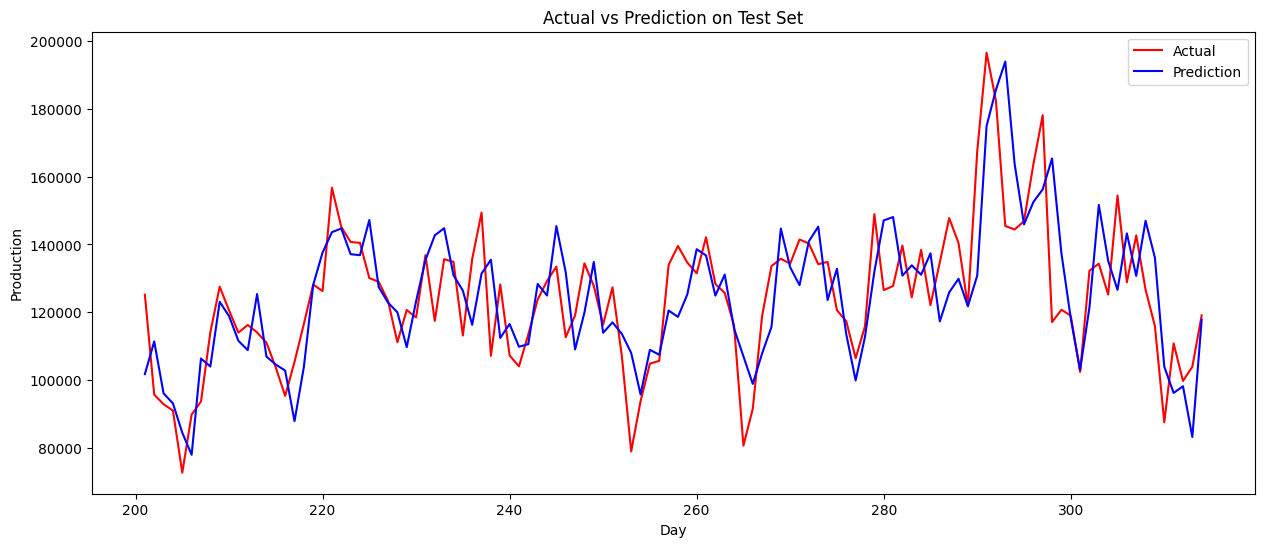

In [46]:
actual_sales_test = sales[200:]
pred_sales_test = predict_dwtest.predicted_mean[200:]


plt.figure(figsize = (15, 6))
plt.plot(day[200:],actual_sales_test, 'r', label='Actual')
plt.plot(day[200:],pred_sales_test, 'b', label='Prediction')

plt.xlabel("Day")
plt.ylabel("Production")
plt.title("Actual vs Prediction on Test Set")
plt.legend()
plt.show()

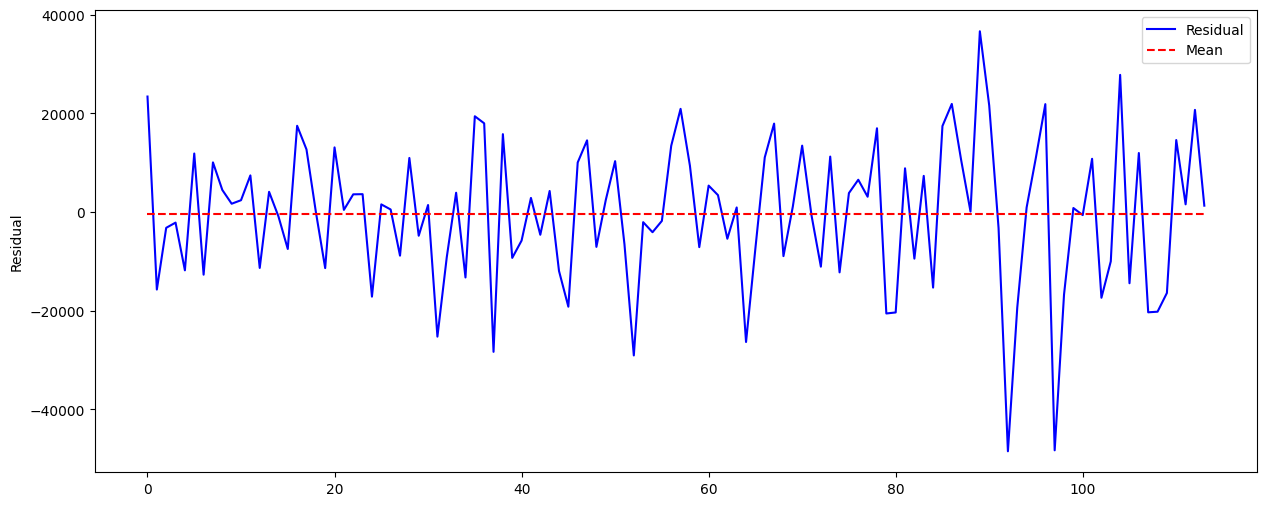

Mean of Residual:    -396.68623388388494
S.D. of Residual:    14584.5063856772
Half Width :         2706.2213950693517   (degree of freedom = 113, Confidence Level = 0.95)
p-value :            0.7720


In [47]:
bijan.resid(res_dwtest.resid[200:])

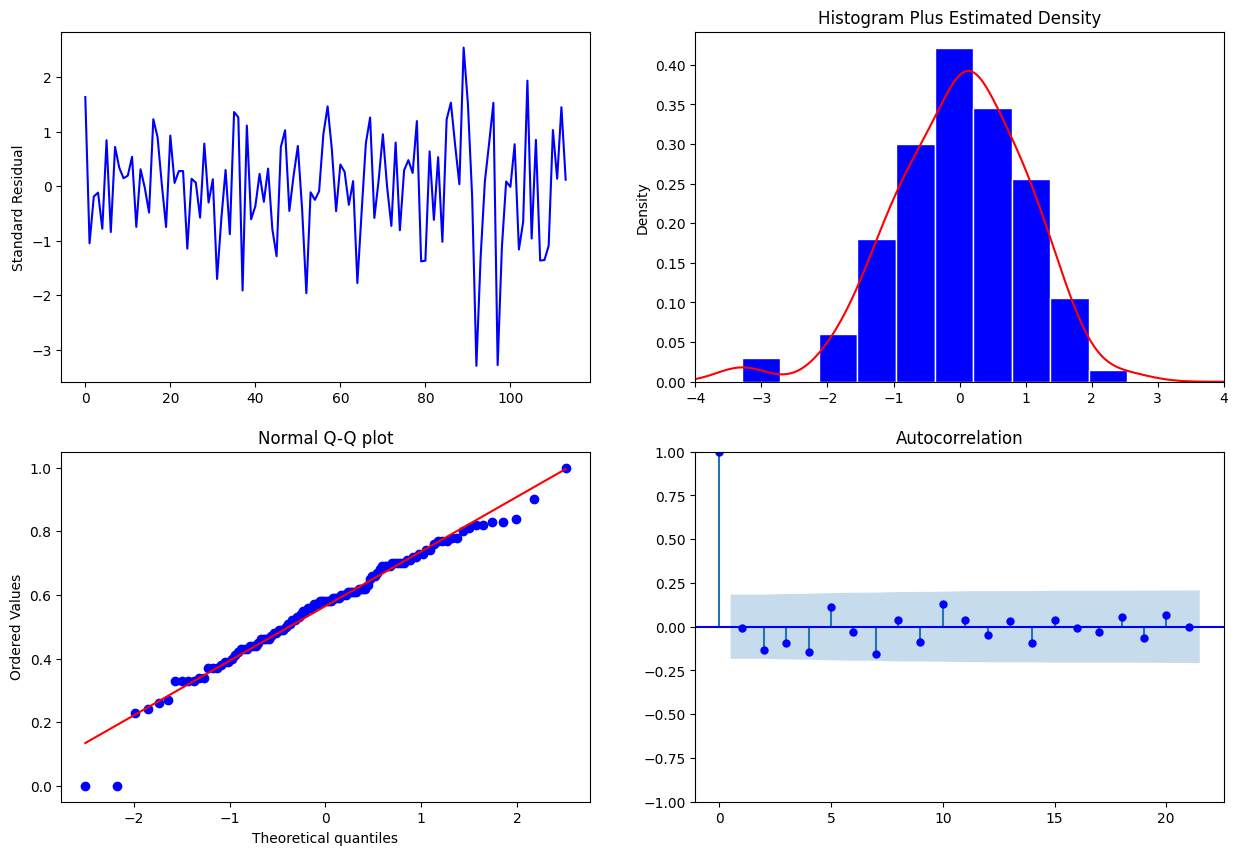

In [48]:
bijan.eplot(res_dwtest.resid[200:])